# Introduction à la  manipulation d'images


## objectifs

L'objectif de ce cours est de vous familiariser aux bases du traitement d'images. L'objectif sera d'abord de découvrir de quelle manière les images sont généralement représentées de façon numérique en programmant des outils permettant de dessiner des motifs simples sur une image. Suite à ça l'objectif sera de réinvestir ces connaissances et compétences dans des exercices de traitement du signal permettant d'aller jusqu'à résoudre des problèmes classiques en science de la vie.

## Utilisation des librairies standards

Pour manipuler des images et les visualiser sur un notebook, il est classique de commencer par utiliser deux librairies.

In [1]:
import numpy as np # Pour manipuler des tableaux de nombres
import matplotlib.pyplot as plt # pour afficher des images

Une image en niveaux de gris est une **grille de valeurs sur deux dimensions**. Chaque valeur de cette grille représente l'intensité lumineuse à une certaine abscisse et une certaine ordonnée. Commençons par définir une telle grille pleine de zéros (une iamge noire) grâce à la librairie numpy.

In [2]:
# Creation d'une image noire de taille hauteur x largeur
# (ou plus précisément d'un tableau de hauteur x largeur nombres tous égaux à zéros
# c'est comme une liste à deux dimensions)
hauteur = 12
largeur = 16
img = np.zeros((hauteur,largeur))#.astype(np.int8)

# Affichage du type de img
print("type(img): "+str(type(img)))
# Affichage de la taille d'une image
print("img.shape: "+str(img.shape))

type(img): <class 'numpy.ndarray'>
img.shape: (12, 16)


Comme on le voit, la variable *img* est de type **numpy.ndarray** ce qui correspond à un tableau à N-dimensions, avec ici *N = 2*. Ce type vient avec certains attributs telle que *shape* qui nous donne sa taille, et des méthodes telles que *transpose()* qui nous permettent de retourner les axes x et y.

La fonction *print()* accepte comme argument les *ndarray*, ce qui nous permettra de voir les valeurs qu'il y a dans notre image. Si on regarde bien le résultat, on voit que cela correspond à une liste de liste comme nous les avions vu dans les cours précédents.

In [3]:
print(img)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Mais il sera bien évidement utile d'afficher l'image comme une image et non comme un tableau de valeurs. Malheureusement cela n'est pas offert par la librairie numpy. Cela fait sens en même temps car elle est dédiée au calcul numérique. Pour afficher une image on utilisera une librarie dédiée à la visualisation de donnée qui s'appelle **matplotlib** (celle déjà utilisée précédemment pour dessiner des graphiques) de cette manière:

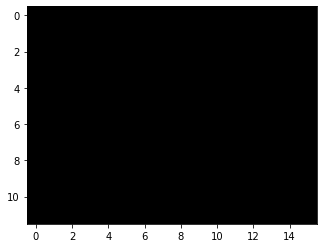

In [5]:
# Affichage de l'image
plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

En traitement d'images il est standard de mettre l'origine de l'image en haut à gauche, comme pour les matrices en mathématiques. Comme on le voit dans cette figure c'est le cas ici. Remarquez également que les fonctions utilisées utilisent d'autres arguments que l'image. Pour l'instant retenons simplement qu'en utilisant ces arguments nous pourrons voir notre image en niveaux de gris.

Remarquez également que la taille de l'image rendue par l'attribut shape a deux éléments qui sont mis entre parenthèses. On appelle cela un tuple. C'est un type similaire aux listes. On peut accéder aux deux éléments grâce aux crochets []. Par contre la particularité du tuple est que l'on ne pourra pas modifier son contenu.

---
### Exercice 1
+ *L'instruction `np.zeros((hauteur,largeur))` n'est pas la plus évidente à retenir. Définir une fonction qui nous permette de créer une image (plus précisément une variable de type np.ndarray) qui vous parle. Cela pourrait être par exemple une fonction `creer_image(hauteur,largeur)` qui retourne une image*
+ *Définir une fonction `printSize(image)` qui prend une image en argument et affiche sa taille comme cela: "La taille de l'image est de 32 x 24 pixels".*
+ *Définir une fonction `montrer_image(image)` qui vous permettra d'afficher une image en une instruction.

---

In [ ]:
# Ex. 1
# def creer_image
# def printSize
# def montrer_image

# test des fonctions
img = creer_image(20,30)

# Représentation des images au format numérique

Les images numériques sont représentées de deux façons: soit elles sont pixelisées, soit elles sont au format vectoriel. Ici nous nous intéresserons au **format pixel**. Les images pixelisées sont découpées sous forme d'une grille de pixels, et pour chaque pixel le niveau de gris ou la couleur est définie à l'aide d'un ou respectivement 3 nombres. Ces nombres sont généralement définis en 8 bits (8 zéros ou uns), ce qui donne un nombre pouvant aller de 0 à 255 compris.

Pour commencer nous travaillerons avec des images en niveaux de gris. Dans ce cas, chaque pixel est défini par un nombre entier allant de 0 à 255. 0 correspondant au noir et 255 au blanc.

## Accès et manipulation des pixels
Pour accéder aux valeurs d'un pixel dans une image, c'est à dire aux valeurs dans un tableau à 2 dimensions, on utilise le même outil que pour les listes: on va utiliser des indexes. Avec une liste à une dimension *ma_liste*, on accédera au premier élément grâce aux crochets et à l'index 0 en écrivant *ma_liste[0]*. Pour accéder à un élément d'une image, il faudra spécifier à quelle ligne et quelle colonne nous voulons accéder, par exemple pour accéder au pixel en haut à gauche de l'image *img* on utilisera l'instruction *img[0,0]*. Comme pour toutes les variables, il sera possible d'accéder à cet élément mais aussi de l'affecter:

In [16]:
# accès
print(img[0,0])

0.0


255.0


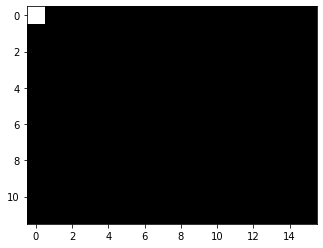

In [17]:
# affectation
img[0,0] = 255

# affichage du résultat
print(img[0,0])

plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

Et bien sur il est également possible de faire des opérations sur chaque valeur de pixel mais aussi sur toutes les valeurs de l'image d'un coup.

In [4]:
# diviser par deux toutes les intensités de l'image
img = 0.5 * img

---
### Exercice 2
+ *Modifier la cellule de code précédente et déterminer comment marche le système de coordonnées pour accéder à un pixel. Est-ce img[x,y] ou img[y,x] ?*
+ *Modifier la fonction que vous avez défini pour créer une image pour qu'elle prenne un argument de plus qui est la couleur par défaut de l'image et qu'elle crée une image de la couleur choisie. Pour cela parcourir tous les pixels en utilisant une boucle for dans une boucle for. Si notre fonction était `creer_image(hauteur,largeur)`, alors elle deviendrait `creer_image(hauteur,largeur,niveau_gris)`*.
+ *Exécuter l'instruction `np.ones?`. Cela vous permet de savoir comment fonctionne la fonction `np.ones()`. Utiliser cette fonction pour écrire une autre version de la fonction `creer_image(hauteur,largeur,niveau_gris)` cette fois-ci sans boucle imbriquée.*

---

In [2]:
# Ex. 2
# def creer_image...

## Accès au dernier, avant dernier... élément sur un axe

Comme nous savons qu'il y a *img.shape[1]* éléments dans une colonne, pour accéder au dernier élément de la première ligne, on pourrait écrire:

In [18]:
print(img[0,img.shape[1]-1])

0.0


Mais cette instruction est longue et python nous offre avec sa syntaxe quelque chose de plus facile. Pour accéder au dernier élément de ma liste, je écrire l'index -1 (`img[0,-1]`), pour l'avant dernier -2 ...

---
### Exercice 3

+ *Créer une cellule de code après cette cellule.*
+ *Changer la couleur d'un pixel en bas à droite de l'image et visualisez le résultat.*
+ *Est-il possible d'utiliser la même opération sur des listes qui ne sont pas des np.ndarray ?*

---


## Accès et manipulation d'une partie de l'image

Alors qu'il est possible de manipuler une image pixel par pixel, il est parfois souhaitable d'accéder à une partie de l'image englobant plusieurs pixelsce qu'on appelle une tranche. Voici un exemple de cette outil:

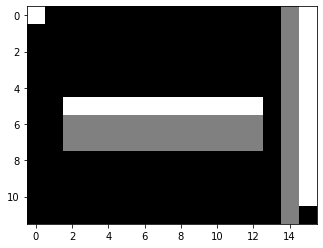

In [19]:
# On peut définir une tranche d'indices qui nous intéressent...
# En donnant le l'indice de début et de fin séparés d'un double point:
img[5,2:-3] = 255
img[6:8,2:-3] = 128
# Attention l'élément avec l'indice de fin n'est pas inclut dans la tranche !

# S'il n'y a pas d'indice à gauche du :, la tranche commencera à l'indice 0
# S'il n'y a pas d'indice à droite du :, la tranche finira au dernier indice 
img[:-1,15] = 255
img[:,14] = 128

plt.imshow(img, cmap='gray',vmin = 0, vmax = 255)
plt.show()

---
### Exercice 4

+ *Faire une image avec un dégradé de niveau de gris de gauche à droite.*
+ *Définir une fonction qui permet de faire un retournement horizontal d'une image.*

---

In [ ]:
# Ex. 4
# img_degrade = ...
# show
# flip
# show

---
### Exercice 5

+ *Sans utiliser le `:`, définir une fonction `draw_line_h(img,y,x1,x2,gray_level)` qui dessine une ligne horizontal sur la ligne y de la colonne x1 à la colonne x2 dans l'image img avec l'intensité gray_level. Supposez d'abord que x2 > x1, puis faites en sorte que cela marche même si x2 < x1.*
+ *Définir une fonction `isInImage(img,x,y)` qui retourne si un pixel est dans l'image img ou non.*
+ *Améliorer la fonction `draw_line_h(img,y,x1,x2,gray_level)` pour qu'elle ne bug pas même si les coordonnées sont en dehors de l'image.*
+ *Définir une fonction qui dessine un rectangle, prenant pour argument une iamge et deux points P1(x1,y1) et P2(x2,y2). On pourra définir la fonction intermédiaire `draw_line_v`.*

---

In [ ]:
# Ex. 5
# def draw_line_h...
# test drawline, show
# def IsInImage
# ...

---
### Exercice 6

*Soit deux points P1(x1,y1) et P2(x2,y2) dans une image, tel que x2 > x1, y2 > y1 et que x2 - x1 > y2 - y1. La fonction draw_line(img,x1,y1,x2,y2,gray_level) définie ci-après permet de dessiner une ligne du point P1 au point P2.*

`def draw_line_simple(img,x1,y1,x2,y2,gray_level):
    for i in range(x1,x2+1):
        j = round(y1 + (y2-y1)*(i-x1)/(x2-x1))
        img[j,i] = gray_level`
        
*En effet, pour i dans [x,x2], (i-x) est dans [0,x2-x1], (i-x1)/(x2-x1) est dans [0,1], (y2-y1) * (i-x1)/(x2-x1) est dans [0, y2-y1] et donc j est dans [y1,y2]. Ainsi pour chaque x entre x1 et x2 inclus, on a dessiné un pixel qui ira de y1 à y2 soit la ligne désirée.*

+ *Sur une image de 320x240 pixels, tester cette fonction pour deux points P1(50,50) et P2(200,70). Tester la pour P1(50,50) et P2(70,200). Que se passe-t-il ? Pourquoi la fonction ne marche pas ? Modifiez la fonction pour qu'elle marche également pour ces points.*
+ Tester la fonction pour P1(200,150) et P2(50,100). Quel est le résultat ? Cela ne marche probablement pas. Modifiez la fonction pour qu'elle marche dans ce cas.Indice: on pourra définir une fonction `permut()` que l'on prendra le soin de définir.
+ *Modifier la fonction afin qu'elle marche même si P1 et P2 sont en dehors de l'image.*

---

In [ ]:
# Ex. 6
def draw_line_simple(img,x1,y1,x2,y2,gray_level):
    for i in range(x1,x2+1):
        j = round(y1 + (y2-y1)*(i-x1)/(x2-x1))
        img[j,i] = gray_level




---
### Exercice 7

*Utiliser les fonctions définies précédemment pour faire de l'art abstrait. Si vous n'avez pas d'inspiration vous pouvez essayer de recréer l'image suivante:*

![art_abstrait](images/ex_art_abstrait.png)

